In [1]:
from sklearn import preprocessing
import os
import librosa
from data_models.dataset2 import BirdDataset
import numpy as np

In [3]:
dataset = BirdDataset(data_path='../data/')

In [4]:
# Ejemplo del dataset de la informacion general
s=dataset[1]

print(s)

{'species': 'Acrocephalus arundinaceus', 'species_encoded': 0, 'audio': 'XC417157', 'spectrogram': array([[-26.529797, -28.434174, -36.508366, ..., -30.12642 , -28.148579,
        -26.529797],
       [-30.04826 , -28.322306, -29.266117, ..., -27.803719, -27.206852,
        -30.04826 ],
       [-29.88448 , -27.930328, -30.223663, ..., -33.16832 , -29.984165,
        -29.88448 ],
       ...,
       [-37.971367, -40.22007 , -52.817772, ..., -36.649685, -29.14058 ,
        -37.971367],
       [-37.957653, -40.287174, -53.452892, ..., -36.82059 , -29.166595,
        -37.957653],
       [-37.97605 , -40.27957 , -52.881454, ..., -36.796227, -29.16441 ,
        -37.97605 ]], dtype=float32)}


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [7]:
# Dataset filtrado con nombres unicos de los audios para crear el dataset train
import librosa
import numpy as np
def parse_dataset(dataset):
    X = []
    y = []
    try:
        for xs in range(len(dataset)):
            audio_value = dataset[xs]['audio']
            if not audio_value in X:
                X.append(audio_value)
                encoded_value = dataset[xs]['species_encoded']
                y.append(encoded_value)

    except:
        print(xs)
        audio_value = dataset[xs]['audio_name']
    return (X, y)

In [8]:
X, y = parse_dataset(dataset)

In [9]:
print("La longitud del conjunto de datos es: ", len(X))

La longitud del conjunto de datos es:  864


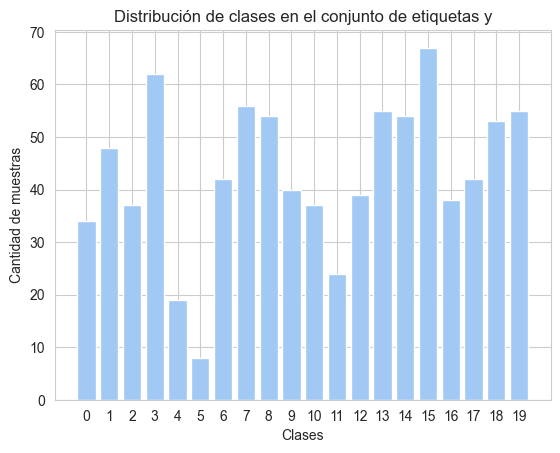

In [66]:
# Contar la cantidad de muestras en cada clase del conjunto de etiquetas y_train
unique, counts = np.unique(y, return_counts=True)

# Definir los datos del conjunto de etiquetas y_train
labels = ['0', '1','2', '3','4', '5','6', '7','8', '9','10', '11','12', '13','14', '15','16', '17','18', '19']
data = [counts[0], counts[1],counts[2], counts[3],counts[4], counts[5],counts[6], counts[7],counts[8], counts[9],counts[10], counts[11],counts[12], counts[13],counts[14], counts[15],counts[16], counts[17],counts[18], counts[19]]

# Dibujar el gráfico de barras
plt.bar(labels, data)

# Añadir títulos y etiquetas de los ejes
plt.title('Distribución de clases en el conjunto de etiquetas y')
plt.xlabel('Clases')
plt.ylabel('Cantidad de muestras')

# Mostrar el gráfico
plt.show()

In [14]:
## Separacion del dataset segun los audios unicos y su clase para posterior crear el train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [15]:
print(len(X_train))
print(len(X_test))

777
87


## Creacion del dataset para train

In [26]:
# Definimos una función para parsear nuestro conjunto de datos y obtener un dataset train
import librosa
import numpy as np
def parse_dataset(dataset):
    X1 = []
    y1 = []
    try:
        for nombre in X_train:
            for xs in range(len(dataset)):
                audio_value = dataset[xs]['audio']
                if audio_value == nombre:
                    spectrogram_value = dataset[xs]['spectrogram']
                    X1.append(spectrogram_value)
                    encoded_value = dataset[xs]['species_encoded']
                    y1.append(encoded_value)

    except:
        print(xs)
        audio_value = dataset[xs]['audio_name']
    return (X1, y1)

In [28]:
X1, y1 = parse_dataset(dataset)

In [42]:
print("La longitud del conjunto de datos  train es: ", len(X1))

La longitud del conjunto de datos  train es:  5131


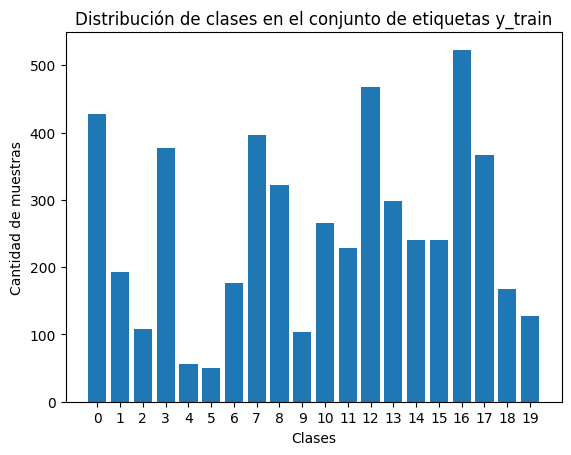

In [36]:
# Contar la cantidad de muestras en cada clase del conjunto de etiquetas y_train
unique, counts = np.unique(y1, return_counts=True)

# Definir los datos del conjunto de etiquetas y_train
labels = ['0', '1','2', '3','4', '5','6', '7','8', '9','10', '11','12', '13','14', '15','16', '17','18', '19']
data = [counts[0], counts[1],counts[2], counts[3],counts[4], counts[5],counts[6], counts[7],counts[8], counts[9],counts[10], counts[11],counts[12], counts[13],counts[14], counts[15],counts[16], counts[17],counts[18], counts[19]]

# Dibujar el gráfico de barras
plt.bar(labels, data)

# Añadir títulos y etiquetas de los ejes
plt.title('Distribución de clases en el conjunto de etiquetas y_train')
plt.xlabel('Clases')
plt.ylabel('Cantidad de muestras')

# Mostrar el gráfico
plt.show()

## Creacion de dataset para el test

In [31]:
# Definimos una función para parsear nuestro conjunto de datos en un dataset test
import librosa
import numpy as np
def parse_dataset(dataset):
    Xtest = []
    ytest = []
    try:
        for nombre in X_test:
            for xs in range(len(dataset)):
                audio_value = dataset[xs]['audio']
                if audio_value == nombre:
                    spectrogram_value = dataset[xs]['spectrogram']
                    Xtest.append(spectrogram_value)
                    encoded_value = dataset[xs]['species_encoded']
                    ytest.append(encoded_value)

    except:
        print(xs)
        audio_value = dataset[xs]['audio_name']
    return (Xtest, ytest)

In [32]:
Xtest, ytest = parse_dataset(dataset)

In [41]:
print("La longitud del conjunto de datos test es: ", len(Xtest))

La longitud del conjunto de datos test es:  514


In [43]:
#Normalizamos y vectorizamos la data train y test
X_train_prep = np.array(X1).reshape((len(X1), 224*224))
X_train_prep = np.array(X_train_prep).astype('float32') / 255
y_train_prep = np.array(y1)

X_test_prep = np.array(Xtest).reshape((len(Xtest), 224*224))
X_test_prep = np.array(X_test_prep).astype('float32') / 255
y_test_prep = np.array(ytest)

In [44]:
X_train_prep

array([[-0.07690212, -0.08317551, -0.09909223, ..., -0.19894484,
        -0.16979398, -0.14041711],
       [-0.05341094, -0.06248976, -0.1128652 , ..., -0.23917179,
        -0.24777652, -0.24942572],
       [-0.04728784, -0.05637361, -0.10727789, ..., -0.26262787,
        -0.14352188, -0.1301287 ],
       ...,
       [-0.26854864, -0.2583808 , -0.23105615, ..., -0.21866484,
        -0.18875617, -0.30916864],
       [-0.06714879, -0.07477561, -0.09726538, ..., -0.22475769,
        -0.20048948, -0.14512774],
       [-0.08692969, -0.10325872, -0.07205562, ..., -0.19856738,
        -0.17002058, -0.10534146]], dtype=float32)

In [45]:
y_train_prep

array([ 9, 13, 13, ...,  6,  6,  6], dtype=int64)

## Balanceo undersampling

In [46]:
# Submuestrear la clase mayoritaria en el conjunto de entrenamiento
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_prep,y_train_prep)

# opcion machine learning KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia de la clase KNeighborsClassifier con k = 3
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

Accuracy: 0.29377431906614787
F1 score: 0.2478033852436692
Precision: 0.2478033852436692


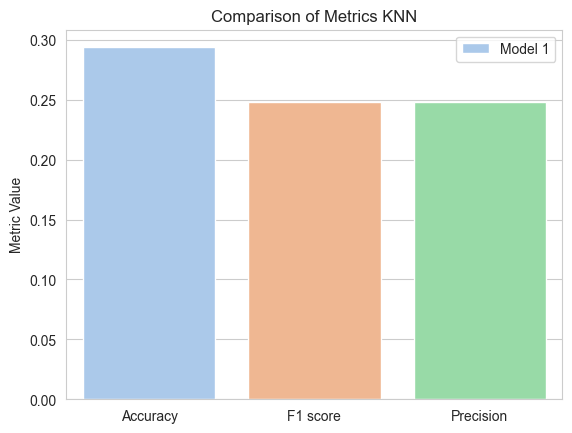

In [59]:
# Hacer predicciones sobre los datos de prueba
y_pred = knn.predict(X_test_prep)

# Calcular la precisión del modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns

accuracy = accuracy_score(y_test_prep, y_pred)
print("Accuracy:", accuracy)
f1score =  f1_score(y_test_prep, y_pred, average='weighted')
print("F1 score:",f1score)
precision =  f1_score(y_test_prep, y_pred, average='weighted')
print("Precision:", precision)

# Create bar plot
labels = ["Accuracy", "F1 score", "Precision"]
metrics_1 = [accuracy, f1score, precision]
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.barplot(x=labels, y=metrics_1, label="Model 1")
plt.legend()

# Add title and ylabel
plt.title("Comparison of Metrics KNN")
plt.ylabel("Metric Value")
plt.show()


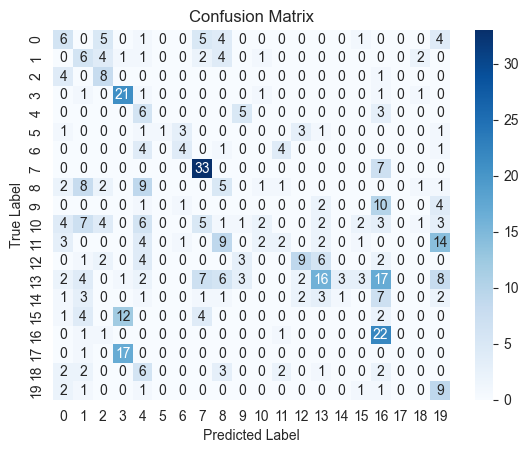

In [49]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Compute confusion matrix
cm = confusion_matrix(y_test_prep, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Opcion Ensemble - Random Forest

In [51]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.utils import resample

In [52]:
# Build the Random Forest model
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [61]:
# Predict the classes of the test data using the model
y_pred2 = model.predict(X_test_prep)


In [62]:
# Calculate the accuracy of the model
accuracy = np.mean(y_pred2 == y_test_prep)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.4669260700389105


Accuracy: 0.4669260700389105
F1 score: 0.446332983790425
Precision: 0.446332983790425


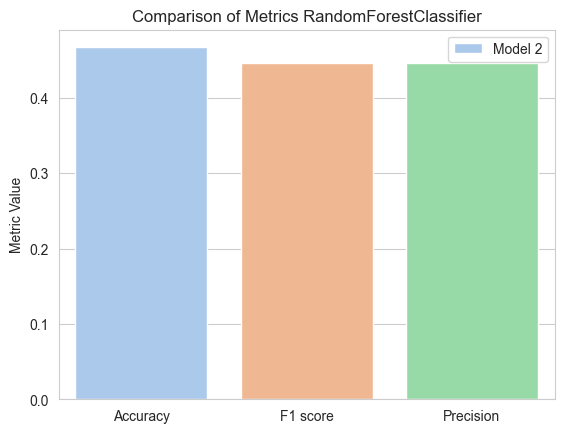

In [63]:
# Calcular la precisión del modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns

accuracy2 = accuracy_score(y_test_prep, y_pred2)
print("Accuracy:", accuracy2)
f1score2 =  f1_score(y_test_prep, y_pred2, average='weighted')
print("F1 score:",f1score2)
precision2 =  f1_score(y_test_prep, y_pred2, average='weighted')
print("Precision:", precision2)

# Create bar plot
labels = ["Accuracy", "F1 score", "Precision"]
metrics_1 = [accuracy2, f1score2, precision2]
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.barplot(x=labels, y=metrics_1, label="Model 2")
plt.legend()

# Add title and ylabel
plt.title("Comparison of Metrics RandomForestClassifier")
plt.ylabel("Metric Value")
plt.show()

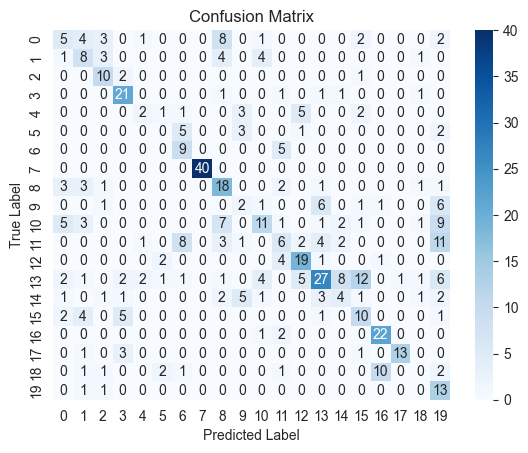

In [64]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Compute confusion matrix
cm = confusion_matrix(y_test_prep, y_pred2)

# Create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()